In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import json
filename = 'data_N10000000_k1000_Nexp10_-1.1372633383635353.json'

with open(filename, 'r') as json_file:
    data = json.load(json_file)

In [15]:
data

{'pool_name': 'QE',
 'initial_energy': -1.1166512474115222,
 'fci_energy': -1.1372633383635353,
 'data_list': [{'energies_statevector': [-1.1166512474115222],
   'energies_uniform': [-1.1166502138738104],
   'energies_vmsa': [-1.1166351099152576],
   'energies_vpsr': [-1.1166682414786429],
   'std_uniform': [7.12559704165466e-05],
   'std_vmsa': [6.400936737341065e-05],
   'std_vpsr': [5.951807735253798e-05],
   'shots_uniform': [[2000000, 2000000, 2000000, 2000000, 2000000]],
   'shots_vmsa': [[2496606, 2500211, 2497688, 2500496, 1]],
   'shots_vpsr': [[1998825, 1999077, 1999081, 1999017, 1]]},
  {'energies_statevector': [-1.1166512474115213,
    -1.116651243785073,
    -0.16669246730467863,
    -0.16669248313035723,
    -1.1367682481117052,
    -1.136768247546139,
    -1.1372632894962993,
    -1.1372632895019195,
    -1.1372633383635302,
    -1.1372633383635282],
   'energies_uniform': [-1.1166643388892037,
    -1.1166560025916081,
    -0.16671235782853772,
    -0.16659741856946023,


In [75]:
shots_uniform = []
shots_vmsa = []
shots_vpsr = []

for i in range(len(data['data_list'])):
    shots_uniform.append([sum(sublist) for sublist in(data['data_list'][i]['shots_uniform'])])
    shots_vmsa.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vmsa'])])
    shots_vpsr.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vpsr'])])

shots_uniform = np.array([item for sublist in shots_uniform for item in sublist])
shots_vmsa = shots_uniform
shots_vpsr = np.array([item for sublist in shots_vpsr for item in sublist] ) + 5000

shots_uniform = np.cumsum(shots_uniform)
shots_vmsa = np.cumsum(shots_vmsa)
shots_vpsr = np.cumsum(shots_vpsr)

print(shots_uniform)
print(shots_vmsa)
print(shots_vpsr)

[ 10000000  20000000  30000000  40000000  50000000  60000000  70000000
  80000000  90000000 100000000 110000000]
[ 10000000  20000000  30000000  40000000  50000000  60000000  70000000
  80000000  90000000 100000000 110000000]
[ 8001001 16002002 24003003 26467451 28909230 38020903 44718231 50942854
 57457276 62973140 69661415]


[1.29342808e+01 1.29342808e+01 1.29342831e+01 6.09042345e+02
 6.09042335e+02 3.10673787e-01 3.10674142e-01 3.06646500e-05
 3.06611233e-05 3.20470677e-12 4.45872246e-12]


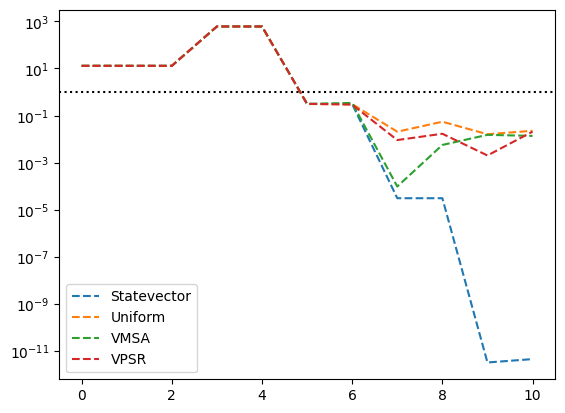

In [51]:
exact_energy = data['fci_energy']
chemac = 627.5094
energies_statevector = np.concatenate([data['data_list'][0]['energies_statevector'], data['data_list'][1]['energies_statevector']])
energies_uniform = np.concatenate([data['data_list'][0]['energies_uniform'], data['data_list'][1]['energies_uniform']])
energies_vmsa = np.concatenate([data['data_list'][0]['energies_vmsa'], data['data_list'][1]['energies_vmsa']])
energies_vpsr = np.concatenate([data['data_list'][0]['energies_vpsr'], data['data_list'][1]['energies_vpsr']])


error_statevector = np.abs(energies_statevector - exact_energy)*chemac
error_uniform = np.abs(energies_uniform - exact_energy)*chemac
error_vmsa = np.abs(energies_vmsa - exact_energy)*chemac
error_vpsr = np.abs(energies_vpsr - exact_energy)*chemac

print(error_statevector)
# print(energies_uniform)
plt.plot(error_statevector, label='Statevector', linestyle='--')
plt.plot(error_uniform, label='Uniform', linestyle='--')
plt.plot(error_vmsa, label='VMSA', linestyle='--')
plt.plot(error_vpsr, label='VPSR', linestyle='--')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('log')
plt.legend()

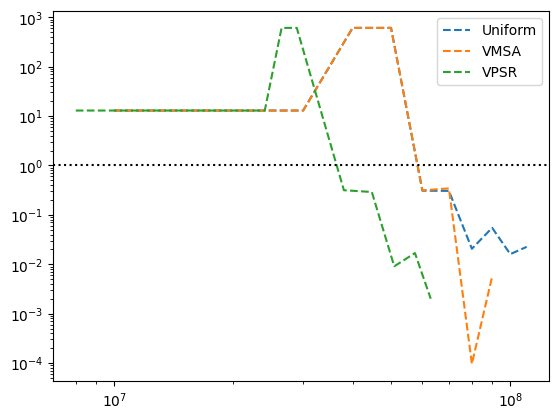

In [79]:



# plt.plot(shots_u, error_statevector, label='Statevector', linestyle='--')
plt.plot(shots_uniform, error_uniform, label='Uniform', linestyle='--')
plt.plot(shots_vmsa[0:-2], error_vmsa[0:-2], label='VMSA', linestyle='--')
plt.plot(shots_vpsr[0:-1], error_vpsr[0:-1], label='VPSR', linestyle='--')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('log')
plt.xscale('log')
plt.legend()

<class 'list'>


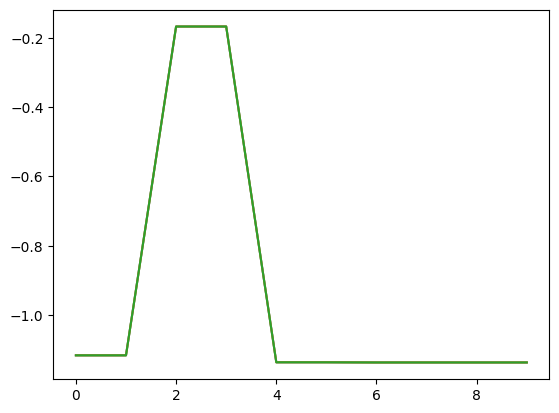

In [29]:
import matplotlib.pyplot as plt


plt.plot(data['data_list'][1]['energies_statevector'])
plt.plot(data['data_list'][1]['energies_uniform'])
plt.plot(data['data_list'][1]['energies_vpsr'])
print(type(data['data_list'][1]['energies_statevector']))
# plt.yscale('log')

In [82]:
exact_energy = data['fci_energy']
chemac = 627.5094
# energies_statevector = np.concatenate([data['data_list'][0]['energies_statevector'][-1], data['data_list'][1]['energies_statevector'][-1]])
# energies_uniform = np.concatenate([data['data_list'][0]['energies_uniform'][-1], data['data_list'][1]['energies_uniform'][-1]])
# energies_vmsa = np.concatenate([data['data_list'][0]['energies_vmsa'][-1], data['data_list'][1]['energies_vmsa'][-1]])
# energies_vpsr = np.concatenate([data['data_list'][0]['energies_vpsr'][-1], data['data_list'][1]['energies_vpsr'][-1]])

shots_uniform = []
shots_vmsa = []
shots_vpsr = []

for i in range(len(data['data_list'])):
    shots_uniform.append([sum(sublist) for sublist in(data['data_list'][i]['shots_uniform'])][-1])
    shots_vmsa.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vmsa'])][-1])
    shots_vpsr.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vpsr'])][-1])

shots_uniform = np.array([item for sublist in shots_uniform for item in sublist])
shots_vmsa = shots_uniform
shots_vpsr = np.array([item for sublist in shots_vpsr for item in sublist] ) + 5000

shots_uniform = np.cumsum(shots_uniform)
shots_vmsa = np.cumsum(shots_vmsa)
shots_vpsr = np.cumsum(shots_vpsr)

print(shots_uniform)
print(shots_vmsa)
print(shots_vpsr)



error_statevector = np.abs(energies_statevector - exact_energy)*chemac
error_uniform = np.abs(energies_uniform - exact_energy)*chemac
error_vmsa = np.abs(energies_vmsa - exact_energy)*chemac
error_vpsr = np.abs(energies_vpsr - exact_energy)*chemac

print(error_statevector)
# print(energies_uniform)
plt.plot(error_statevector, label='Statevector', linestyle='--')
plt.plot(error_uniform, label='Uniform', linestyle='--')
plt.plot(error_vmsa, label='VMSA', linestyle='--')
plt.plot(error_vpsr, label='VPSR', linestyle='--')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('log')
plt.legend()

TypeError: 'int' object is not iterable